<h1><strong> <center>Classifying Outfit with Pytorch</center></strong></h1>

# 1. Introduction

PyTorch is an open-source machine learning framework that allows developers to easily build and train neural networks. 
It was developed by Facebook's artificial intelligence research group and released in 2016. 
PyTorch is built on top of Python and provides two main features: a multi-dimensional tensor library and a dynamic computational graph.

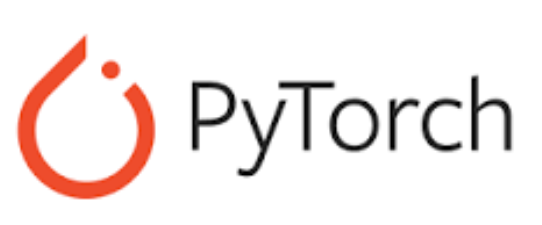

Pytorch uses several modules to provide the ability of easily building and modifiying Neural Networks. Pytorch uses a data structure that is key for you to deeply understand it: the tensor.

The tensor library in PyTorch provides a powerful array data structure that is similar to NumPy arrays, but with added support for GPUs. This makes PyTorch a popular choice for deep learning, where large amounts of data are processed in parallel on GPUs. As Numpy does, Pytorch includes a useful number of methods to manipulate tensors, such as reshaping, slicing, and concatenating.

The dynamic computational graph in PyTorch is a unique feature that allows for more flexibility in building and training neural networks. Unlike static computational graphs, where the structure of the graph is determined before training begins, PyTorch allows for the graph to be modified dynamically during training. This means that developers can easily experiment with different network architectures and training strategies, without having to rewrite the entire network from scratch.

In addition to its core features, PyTorch includes a number of useful libraries and tools for building and training neural networks. These include 
* <strong>TorchScript:</strong> allows developers to export PyTorch models to a format that can be run in other environments, such as C++ or mobile devices.
* <strong>TorchVision:</strong> provides pre-trained models and datasets for computer vision tasks.
* <strong>TorchVideo:</strong> a deep learning library for video understanding research
* <strong>Lightning:</strong> the Deep Learning framework to train, deploy, and ship AI products Lightning fast.
* <strong>TorchDrug:</strong> a powerful and flexible machine learning platform for drug discovery
* <strong>Transformers:</strong> State-of-the-art Machine Learning architecture for Natural Language Processing

Overall, PyTorch is a powerful and flexible machine learning framework that is widely used in both research and industry. Its ease of use, dynamic computational graph, and GPU support make it a popular choice for deep learning applications.

# 2. My First Machine Learning model

In this session, you won't code too much. Why? Because our purpose is you spend most of your time reading through the code included in this notebook.
The notebook will run a complete Machine Learning model, we will walk through its building steps:
* Load data from an external file
* Preprocess data
* Define the Machine Learning model architecture
* Train the model
* Test the model performance
* Make your own predictions

If you don't get some of the parts described here, don't worry!. We'll go back to them later in this course. Just run the code and enjoy watching how your computer learns and tries to build a better world!

# 3. Installing Pytorch

Please visit the following link: <a> https://pytorch.org/get-started/locally/ </a> to check out how to install Pytorch in your plattorm.
If you use Microsoft Windows as your Operating System, just type the following command in your Conda environment

conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

Pytorch is a large package. It requires a while to install. Be patient!
Don't forget to check if pytorch has been properly installed using the following command

(my_conda_environment)$ conda list pytorch

# 4. Building the Machine Learning model

## Importing modules
Let's import the main libraries we're going to use in this project. We're going to take advantage of the modules that preprocess the data for us. We'll use the following Pytorch built-in modules:
* Dataloader
* Torchvision

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


## Downloading datasets

Every single Machine Learning model needs data to work. Data is usually divided in three parts:
* <strong>Training dataset:</strong> is the portion of data the model uses to learn how it behaves. With this dataset, it learns patterns and how to predict
* <strong>Validation dataset:</strong> a portion of the training dataset is used not to train the model, but to check if the model is learning properly. We call this portion validation dataset
* <strong>Test dataset:</strong> after the model is trained, we take a portion of data and make the model run. We test if the model is predicting correctly. It's important to understand that this part of the dataset is never used to train the model!    

For the sake of simplicity, we'll start using a training dataset and a test dataset.

In [2]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

It's key you understand how the dataset is built. Once you've gone through Numpy and Pandas crash course, you've got the right toolbox.
Let's use them!

In [3]:
print(training_data)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


<strong>Exercise 1: </strong>Figure out the data structure type of training_data

In [4]:
### Your code starts here ###

type(training_data)

### Your code ends here ###

torchvision.datasets.mnist.FashionMNIST

We are dealing with a weird type of data, it seems that the data is an FashionMNIST object: a customized object by Pytorch. Pytorch provides you some shortcuts to deal witht them as arrays

<strong>Exercise 2: </strong> Print the length of the dataset

In [5]:
### Your code starts here ###

dataset_length = len(training_data)

### Your code ends here ###

print("The length of the dataset is {0:d}".format(dataset_length))

The length of the dataset is 60000


Therefore, the function used for arrays works in the FashionMNIST object. Let's try to dig deeper in our dataset

<strong>Exercise 3: </strong> Extract the element in position 2501 a show the type of data you've extracted

In [6]:
### Your code starts here ###

data_type = type(training_data[2500])

### Your code ends here ###

print("The type of data you have extracted from FashionMinst is {0:s}".format(str(data_type)))

The type of data you have extracted from FashionMinst is <class 'tuple'>


So you now know the type of data every single element of the FashionMNIST dataset is. Let's check out what it keeps inside

<strong>Exercise 4: </strong> Check out the data type of the first element of the tuple and print it

In [18]:
### Your code starts here ###

first_part_tuple = training_data[3507][0]

type_first_element = type(first_part_tuple)

### Your code ends here ###

print("The first part of the tuple is a {0:s}".format(str(type_first_element)))


The first part of the tuple is a <class 'torch.Tensor'>


Ok now we are in front of our first Pytorch Tensor. Let's learn cool stuff about it

<strong>Exercise 5: </strong> Show the shape of the tensor

In [19]:
### Your code starts here ###

shape = first_part_tuple.size()

### Your code ends here ###

print("The shape of the Torch tensor is {0:s}".format(str(shape)))

The shape of the Torch tensor is torch.Size([1, 28, 28])


Ok we are dealing with a 3-dimensional matrix. It seems to be a grayscale picture. Let me explain why. In computers, colour pictures are represented with 3-dimensional matrices. This means that in general a picture is represented by three two-dimensional matrices that contain:
* 1st matrix: the amount of red colour every single pixel of the picture has
* 2nd matrix: the amount of green colour every single pixel of the picture has
* 3rd matrix: the amount of blue colour every single pixel of the picture has

The following picture shows the format explained above:
    
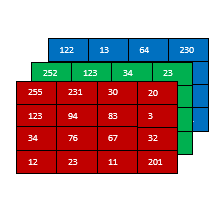

Thus, the picture provided by Pytorch seems to be a normalized grayscale image (there is only one matrix in the first dimension, with values between 0 and 1) with 28x28 pixels of resolution.

Now let's try to see what the picture contains. We're going to use the matplotlib module.

TypeError: Invalid shape (1, 28, 28) for image data

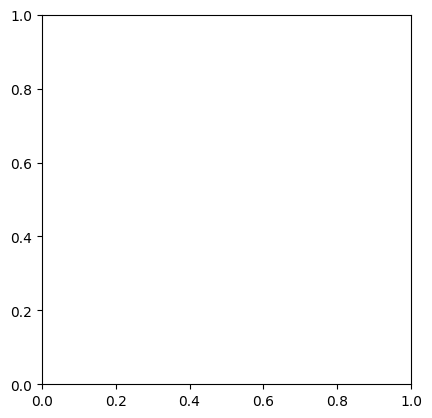

In [20]:
from matplotlib import pyplot as plt

# Uncomment next instruction to show the image 
plt.imshow(first_part_tuple)

Uhm, it seems that matplotlib doen't understand what Pytorch gives as picture. Why? I'll give you the answer, matplotlib expects the picture. Maplotlib expects the three RGB matrices as the third dimension, MNIST library provides the three RGB matrices as the first dimension, let's reshape our matrix to fit matplotlib requirements

<strong>Exercise 5: </strong> Reshape the dimensions of your first_part_tuple variable to get [28,28,1] instead of [1,28,28]

In [21]:
### Your code starts here ###

permuted_picture =  first_part_tuple.permute(1, 2, 0)

### Your code ends here ###

print ("The shape of the permuted image is now: {0:s}".format(str(permuted_picture.size())))

The shape of the permuted image is now: torch.Size([28, 28, 1])


Now maplotlib will be able to draw the picture, let's try it

<strong>Exercise 6: </strong> Draw the picture represented in the variable permuted_picture

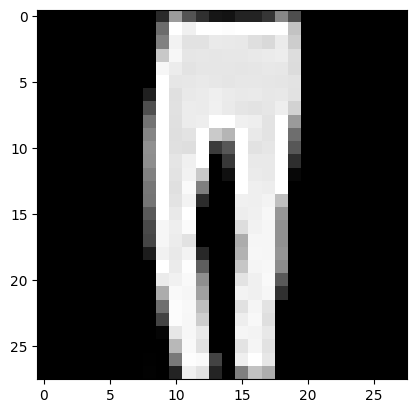

In [22]:
### Your code starts here ###

plt.imshow(permuted_picture,cmap='gray', vmin=0, vmax=1)

### Your code ends here ###

Ok now we can see what it looks like a dress! We know what the first element of the tuple contains. It contains a picture of a piece of clothe. But, what does the second part of the tuple represent? Let's check out the value the second part of the tuple contains

<strong>Exercise 7: </strong> Check the value of the second element of the 2500th tuple

In [24]:
### Your code starts here ###

second_value =  training_data[3507][1]

### Your code ends here ###

print("The second value of the tuple place in the 2500th position is {0:d}".format(second_value))


The second value of the tuple place in the 2500th position is 1


Therefore, we can conclude that FashionMNIST is a database of classified outfits.

Now we know that the second part is what in Machine Learning is called the Label or Ground Truth. The label or ground truth is the information that the model uses to learn. The following list shows what every integer stands for: 

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


<strong>Exercise 8: </strong> Take a while to have a glance at different pictures and their label. Change the value of variable pic to see other outfits.

The picture in the position number 3507 is a Trouser


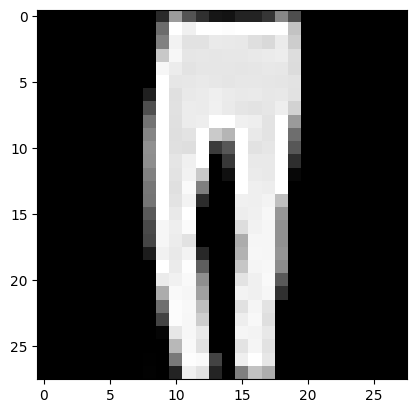

In [25]:
pic = 3507

label_dict = {
    0 : 'T-shirt',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankel boot'
}

### Your code starts here ###

picture = training_data[pic][0]
permuted_picture = picture.permute(1, 2, 0)
plt.imshow(permuted_picture,cmap='gray',vmin=0,vmax=1)

### Your code ends here ###

print("The picture in the position number {0:d} is a {1:s}".format(pic,label_dict[training_data[pic][1]]))



## Structuring datasets

We are going to pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

## Creating the Machine Learning model

### Enabling GPU hardware

Machine Learning foundations are based on Linear Algebra and number crunching with matrices. In order to make calculations with this huge amount of matrices, there exists specific hardware designed to speed this calculation up. This hardware is commonly called Graphics Processing Unit or <strong>GPU</strong>. 
Let's check if your computer has a GPU available for this project

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print("I have found {0:s} device".format(device))

As it's shown above, Pytorch includes a subclass named cuda in order to deal with GPU hardware. Let's figure out the name of the GPU your computer has installed.

In [ ]:
if torch.cuda.is_available():
    print("There is a GPU available with the name {0:s}".format(torch.cuda.get_device_name(0)))
    torch.cuda.get_device_name(0)

### Define your first Neural Network

All hands on deck! Your're ready to build your first neural network. First of all let's briefly describe what a Neural Network is:

A neural network is a type of machine learning algorithm that is modeled after the structure and function of the human brain.
It consists of a set of interconnected nodes or "neurons" organized into layers. Each neuron takes input from the neurons in the previous layer, performs a computation, and then passes its output to the next layer of neurons. Each neuron is composed of two parts:
* <strong>A linear equation</strong>: it has the form y = w * x + b where:
    * x is the input of the previous neuron
    * w is the weight, the machine learning model will adjust the value of the weights in order to fit the model
    * b is the bias, the machine learning model will adjust the value of the bias in order to fit the model
* <strong>An activation function</strong>: tt determines whether the neuron should "fire" and transmit its output to the next layer of neurons or not. The activation function introduces non-linearities into the network, which enables it to learn complex patterns in the input data. There are many different types of activation functions, each with its own advantages and disadvantages, in this example we will use the RELU activation function

Depending on the number of layers, there are several types of neural networks, the following picture shows some of them:

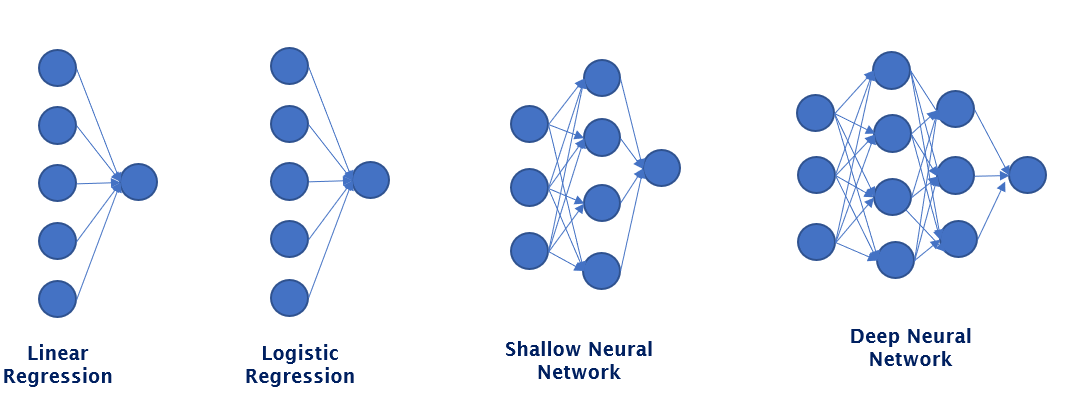

The presence of an activation function differentiates the Logistic Regression from the Linear Regression. The presence of more than one hidden layer differentiates the Deep Neural Network from the Shallow Neural Network

It's a good practice to draw a sketch of the network you want to implement. The sketch should show the dimensions of the input, and how the number of neurons changes throughout your architecture. Please have a glance at our proposal of neural network.

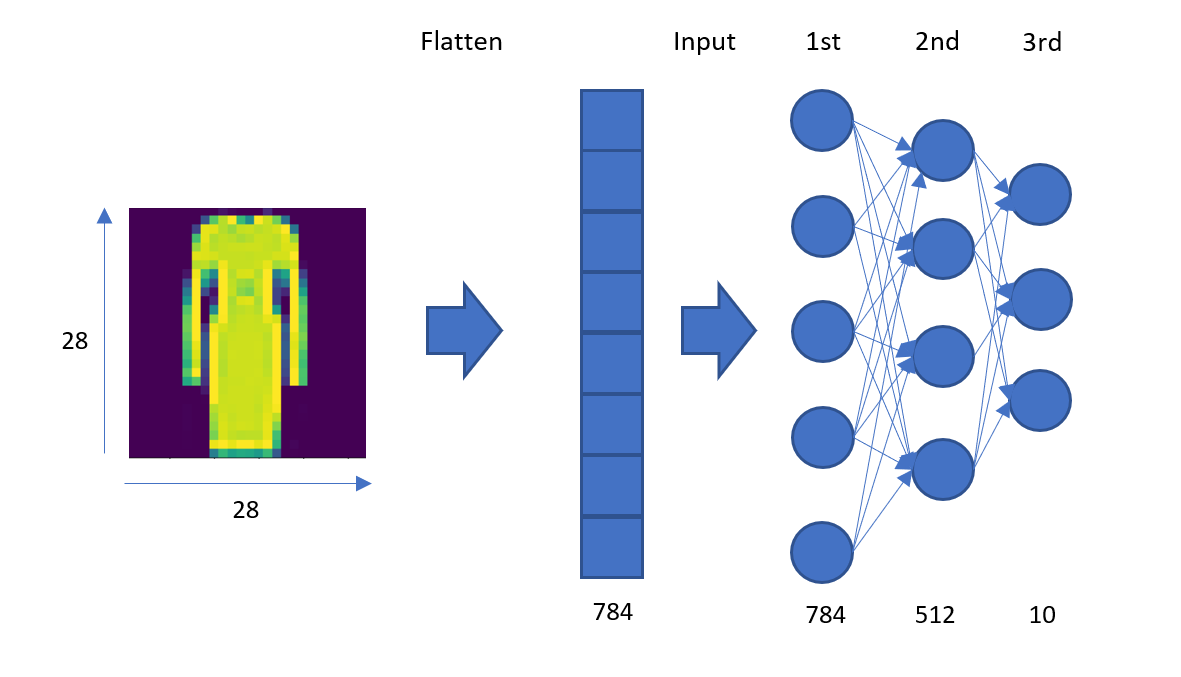

#### Build the architecture

In [ ]:
# Define model
import torch.nn.functional as F


class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28*28,512)
        self.Linear2 = nn.Linear(512,512)
        self.Linear3 = nn.Linear(512,10)
    
    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x)) 
        output = F.relu(self.Linear3(x)) 
        return output
    
    
model = MyNeuralNetwork().to(device)


We've defined our Neural Network, you can use the print instruction to check out some information of what you've created

In [ ]:
print(model)

<strong>Exercise 9</strong>: Modify your neural network in order to include an additional hidden layer of 1024 neurons. Insert your new hidden layer between the current layer 2 and layer 3. 

In [ ]:
### Your code starts here ###

class MyAlternativeNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.Linear1 = nn.Linear(28*28,512)
        self.Linear2 = nn.Linear(512,512)
        self.Linear3 = nn.Linear(512,1024)
        self.Linear4 = nn.Linear(1024,10)
    
    def forward(self, input):
        x = self.flatten(input)
        x = F.relu(self.Linear1(x))
        x = F.relu(self.Linear2(x))
        x = F.relu(self.Linear3(x)) 
        output = F.relu(self.Linear4(x)) 
        return output
    
    
my_other_model = MyAlternativeNeuralNetwork().to(device)

### Your code ends here

print(my_other_model)

#### Define the loss Function

The loss function is the method of evaluating how well your algorithm models the given data. If predictions of your model deviate too much from actual results, loss function would output a very large number. If your model is doing well, the loss function will output a low number.

Gradually, with the help of the optimization function, loss function learns to reduce the error in prediction. 

Pytorch provides you with a complete toolbox with most used loss functions in Machine Learning. Please visit the following link for more information: <a> https://pytorch.org/docs/stable/nn.html#loss-functions </a>

<strong> Exercise 10: </strong> Set the Cross Entropy Loss function as the loss function for your experiment

In [ ]:
### Your code starts here ###

loss_fn = nn.CrossEntropyLoss()

### Your code ends here ###

#### Define the Optimization Function

Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and bias in order to reduce the loss provided by the loss function.

As in the loss function case, Pytorch provides a full set of optimization algorithms that fits your optimization requirements. Please have a look at the following link to learn more about optimization algorithms. <a> https://pytorch.org/docs/stable/optim.html </a>

<strong> Exercise 11: </strong> Set up the Stochastic Gradient Descent Algorithm with a learning rate = 1e-3

In [ ]:
### Your code starts here ###

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

### Your code ends here ###

#### Building the training loop

Now we have all the tools to train our model. Training a model is an iterative process performed by a for loop. The training process is built with four bricks:
* <strong>forward pass</strong>: in this step we plug in a batch of our training data and get the output. Then we compare the result of our model and the actual data.
* <strong>backward pass</strong>: this step deals with the math neccesary to make the optimization work. We will dig into this step in the next code challenge
* <strong>optimization</strong>: here we modify the weights and bias of our model in order to approach our results to the actual data and, therefore, minimize the loss
* <strong>repetition</strong>: we repeat the algorithm as many times the number of epochs defines.

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Forward pass
        predicted = model(X)
        loss = loss_fn(predicted, y)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # Optimization
        optimizer.step()
                
        # printing the loss every 100 epoc
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print("Loss with batch nº {0:d}: {1:.6f}".format(current,loss))

Take a while to get how the train loop works, you will get better understanding if you print how the loop runs through the dataloader.

<strong>Exercise 12</strong>: Write down a loop to print the number of batch with the shape of every single train batch (X) and its label (y). 

In [ ]:
### Your code starts here ###

for batch, (X, y) in enumerate(train_dataloader):
    print("X {0:d}: {1:s}".format(batch,str(X.size())))
    print("y {0:d}: {1:s}".format(batch,str(y.size())))
    
### Your code ends here ###

X 774: torch.Size([64, 1, 28, 28])
y 774: torch.Size([64])
X 775: torch.Size([64, 1, 28, 28])
y 775: torch.Size([64])
X 776: torch.Size([64, 1, 28, 28])
y 776: torch.Size([64])
X 777: torch.Size([64, 1, 28, 28])
y 777: torch.Size([64])
X 778: torch.Size([64, 1, 28, 28])
y 778: torch.Size([64])
X 779: torch.Size([64, 1, 28, 28])
y 779: torch.Size([64])
X 780: torch.Size([64, 1, 28, 28])
y 780: torch.Size([64])
X 781: torch.Size([64, 1, 28, 28])
y 781: torch.Size([64])
X 782: torch.Size([64, 1, 28, 28])
y 782: torch.Size([64])
X 783: torch.Size([64, 1, 28, 28])
y 783: torch.Size([64])
X 784: torch.Size([64, 1, 28, 28])
y 784: torch.Size([64])
X 785: torch.Size([64, 1, 28, 28])
y 785: torch.Size([64])
X 786: torch.Size([64, 1, 28, 28])
y 786: torch.Size([64])
X 787: torch.Size([64, 1, 28, 28])
y 787: torch.Size([64])
X 788: torch.Size([64, 1, 28, 28])
y 788: torch.Size([64])
X 789: torch.Size([64, 1, 28, 28])
y 789: torch.Size([64])
X 790: torch.Size([64, 1, 28, 28])
y 790: torch.Size([64

X 932: torch.Size([64, 1, 28, 28])
y 932: torch.Size([64])
X 933: torch.Size([64, 1, 28, 28])
y 933: torch.Size([64])
X 934: torch.Size([64, 1, 28, 28])
y 934: torch.Size([64])
X 935: torch.Size([64, 1, 28, 28])
y 935: torch.Size([64])
X 936: torch.Size([64, 1, 28, 28])
y 936: torch.Size([64])
X 937: torch.Size([32, 1, 28, 28])
y 937: torch.Size([32])


Once you've printed the whole loop and the shape of the matrices your are plugging into the model, everything seems to be clear enough. In a cell shown above, we figured out the number of samples the training dataset contains: 60000 pictures.
60000 / 64 = 937 batches of 64 samples and a last batch with 32 samples

So the training loop will run <strong>937 times</strong> loading <strong>64 samples</strong> of the training dataset and a last time with 1 batch of 32 samples

#### Define the Test Function

Once we've defined our training function we can test our model to check out if the model can predict what type of clothing we have in every single sample of the test dataset


<strong>Exercise 13</strong>: Print the number of samples included in the test dataset 

In [ ]:
test_data

In [ ]:
### Your code starts here ###

dataset_len = len(test_data)

### Your code ends here ###

print("The number of samples included in the test dataset is: {0:s}".format(str(dataset_len)))

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    avg_loss = test_loss / num_batches
    
    accuracy = (correct / size) * 100
    
    print("Test Error: \n Accuracy: {0:.2f} %, Average loss: {1:.6f}".format(accuracy,avg_loss))

### Putting all together

Everything is ready to go. Now we can run train and test functions. Let's run the machine

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"\nEpoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("\nTraining done!")

### Saving the Pytorch model

You can reuse your trained model whenever you want. To do that, you have to save it first

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

### Loading a saved Pytorch model

You can use your saved model for further predictions. For this purpose, please load it first.

In [ ]:
model = MyNeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

### Predicting type of outfit

Now you can use your model to predict wich of the outfit included in the experiment is present in your picture. Next function gives you the ability to use the model to do so

In [ ]:
def outfit_predictor(outfit,model):
    classes = [
        "T-shirt/top",
        "Trouser",
        "Pullover",
        "Dress",
        "Coat",
        "Sandal",
        "Shirt",
        "Sneaker",
        "Bag",
        "Ankle boot"
        ]
    x, y = outfit[0], outfit[1] 
    model.eval()
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        return predicted,actual
        
    
    

<strong>Exercise 14</strong>: Choose any picture of the dataset and test if the model predicts what type of outfit it is. For example the picture number 7001

In [ ]:
### Your code starts here ###

outfit = test_data[7000]

predicted,actual = outfit_predictor(outfit,model)

### Your code ends here ###

print("Predicted: {0:s}, Actual: {1:s}".format(predicted,actual))

As final drill, let's make a photo to any outfit you have available just now and check if the model is able to predict what it is. The next function takes the picture and predicts what it is.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 

def outfit_predict_from_image(url,model):

    classes = [
            "T-shirt/top",
            "Trouser",
            "Pullover",
            "Dress",
            "Coat",
            "Sandal",
            "Shirt",
            "Sneaker",
            "Bag",
            "Ankle boot"
            ]
    # Converting to gray-scale picture (just one matrix instead of three RGB matrices)
    img = Image.open(url).convert('L')

    # Resizing to (28,28
    image = np.array(img.resize((28, 28)))/255

    # Adding one dimension to fit the shape Pytorch expects
    image = image.reshape(1,28,28)

    # Converting to Torch tensor
    torch_image = torch.from_numpy(image)

    # Flattening the 28,28 matrix (check the model architecture) and converting to float number type
    torch_image = torch_image.reshape(1,28*28).float()

    # Predicting
    with torch.no_grad():
        pred = model(torch_image)
    
    # Matching the prediction with the type of outfit
    predicted = classes[pred[0].argmax(0)]

    return(predicted,image)

<strong>Exercise 15</strong>: Use the function coded below to predict the outfit you've just made a picture of.

In [ ]:
### Your code starts here ###

outfit_prediction,image = outfit_predict_from_image ('./images/outfit_example.png',model)

### Your code ends here ###

print('The machine has predicted that your picture is a {0:s}.'.format(outfit_prediction))

In [ ]:
plt.imshow(image.reshape(28,28),cmap='gray',vmin=0,vmax=1)


<strong>Exercise 16</strong>: Try to improve the Accuracy of your model. What should you do? Wich of all parameters shown above should you modify?